# Prob no3 - Method for calculating profitability 

In [1]:
import pandas as pd
import numpy as np
import random 
from scipy import linalg
import math
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
dataset = "C:/Users/i235jbp/Dropbox/PhD/Spørreundersøkelse/R/datasett_bus_surv_no2.csv"

In [156]:
df = pd.read_csv(dataset, sep=",", engine='python')


In [21]:
# df.drop(['navn', 'orgnr_foretak', 'f_postnr', 'sn07_1'], axis=1, inplace=True)
df['orgnr'] = df['orgnr']-random.randint(1,1000)
df['orgnr_foretak'] = df['orgnr_foretak']-random.randint(1,1000)
df['employ'] = df['employ']+random.randint(1,15)
df.head()


,orgnr,orgnr_foretak,navn1,sector,bof_nace07,inves_fou,inves_fou_sale,inves_facilities,inves_facilities_sale,inves_plot,...,cashlimit,cashlimit1,equityFunding,debtFunding,signHurdle,sensitivity,hurdleRate,uncertainCash,_est_no21,_est_no22
0,811279858,811280175,HOVLAND TREVAREFABRI,2100.0,16.232000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,1
1,812749068,812749385,Bergene Holm AS,2100.0,16.100000,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,0,0,1,0,1,1
2,816063118,816063435,SNØGG AS,2100.0,21.200001,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,0,1,1,1,1
3,829093598,829093915,STRYN BETONGELEMENT,2100.0,23.610001,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,1,1
4,832008348,832008665,SKIBSPLAST A/S,2100.0,30.120001,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,0,1,1


In [157]:
df.drop(['navn1'], axis=1, inplace=True)

In [158]:
df['higheduc'] = df['higheduc'].fillna(1)

In [159]:
df_shortlong3.groupby('higheduc').describe()

smallcap                                              largecap  \
            count      mean       std  min  25%  50%  75%  max    count   
higheduc                                                                  
-99.0        11.0  0.181818  0.404520  0.0  0.0  0.0  0.0  1.0     11.0   
 0.0        112.0  0.437500  0.498308  0.0  0.0  0.0  1.0  1.0    112.0   
 1.0        186.0  0.327957  0.470736  0.0  0.0  0.0  1.0  1.0    186.0   

                    ... profitratio            debt_asset                      \
              mean  ...         75%        max      count      mean       std   
higheduc            ...                                                         
-99.0     0.363636  ...    9.631556  25.566904        8.0  0.650844  0.146475   
 0.0      0.178571  ...    9.647695  39.085167      102.0  0.655571  0.186282   
 1.0      0.188172  ...    9.487511  27.591383      176.0  0.621708  0.200992   

                                                            
               min       25%       50%       75%       max  
higheduc                                                    
-99.0     0.424696  0.551677  0.664877  0.758505  0.837235  
 0.0      0.222080  0.531975  0.660767  0.790876  1.091215  
 1.0      0.118737  0.492791  0.626493  0.765255  1.311110  

[3 rows x 96 columns]

In [162]:
df['no9'].groupby(df['higheduc']).describe()

,count,mean,std,min,25%,50%,75%,max
higheduc,,,,,,,,
0.0,112.0,2.348214,1.257123,1.0,1.0,2.0,3.0,5.0
1.0,197.0,-1.000000,18.902813,-99.0,1.0,2.0,4.0,5.0


In [197]:
# list of explanatory variables, important to stack the variables and estimated parametes in the same order
explanatoryNo3 = ['higheduc', 'smallcap','largecap',  'subsidary', 'no2_1', 'no2_2', 'sensitivity' ,'hurdleRate']
explanatoryLong = ['higheduc', 'smallcap','largecap',  'subsidary', 'no2_1', 'no2_2', 'sensitivity' ,'hurdleRate', 'no3_1', 'no3_2', 'no3_3','no3_4', 'no3_5', 'no3_6', 'profitratio', 'debt_asset']

# make a new df
df_short3 = df.copy(deep=True)
df_shortlong3 = df.copy(deep=True)

In [127]:
# df_short3.isnull()

In [198]:
df_short3=df_short3.loc[:,explanatoryNo3]
df_shortlong3=df_shortlong3.loc[:,explanatoryLong]

# df_short3 = df_short3.dropna(axis=0, how='any')
df_shortlong3.head()

,higheduc,smallcap,largecap,subsidary,no2_1,no2_2,sensitivity,hurdleRate,no3_1,no3_2,no3_3,no3_4,no3_5,no3_6,profitratio,debt_asset
0,0.0,1,0,0,1,1,0,1,0,0,0,0,0,1,-5.655974,0.742152
1,1.0,0,1,0,2,2,0,1,0,0,0,1,0,0,6.764232,0.569669
2,1.0,1,0,0,2,2,0,1,0,1,1,0,0,0,1.205634,0.623949
3,0.0,1,0,0,3,0,0,0,0,0,0,0,0,1,-4.339672,0.737397
4,0.0,1,0,0,1,2,0,1,0,0,0,0,1,0,-29.164217,0.836163


In [199]:
df_shortlong3.isnull().describe()

,higheduc,smallcap,largecap,subsidary,no2_1,no2_2,sensitivity,hurdleRate,no3_1,no3_2,no3_3,no3_4,no3_5,no3_6,profitratio,debt_asset
count,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,309,309,309,309,309,309,309,309,309,309,309,309,309,309,286,286


In [200]:
# df_short.dropna(axis=0, how='any', inplace=True)
X_3 = df_short3.values
y_31 = df_shortlong3['no3_1'].values
y_32 = df_shortlong3['no3_2'].values
y_33 = df_shortlong3['no3_3'].values
y_34 = df_shortlong3['no3_4'].values
y_35 = df_shortlong3['no3_5'].values
y_36 = df_shortlong3['no3_6'].values


## Regresjonsresultater

                    EAC   &      IRR   &        NPV   &       Payback   &      Other models   &        No model   \\
Small cap    &       0.047   &      -0.142   &      -1.152***&      -0.183   &       0.940*  &       0.544   \\
Large cap    &       0.426   &       1.265***&       0.956** &       0.292   &       1.154** &           .   \\
Higher education    &       0.282   &       0.626*  &       0.857** &       0.259   &      -0.305   &      -1.046** \\
Subsidiary   &       0.588   &       0.583*  &      -0.217   &       0.465   &       0.048   &      -1.009   \\
Freq. of EquityFunding       &       0.459   &       0.244   &      -0.565** &       0.287   &       0.554   &      -0.538   \\
Freq of DebtFunding       &      -0.288   &       0.064   &      -0.522***&       0.201   &       0.435** &      -0.013   \\
Sensitivity analysis &      -0.251   &       1.348***&       1.167***&       0.274   &      -0.598   &           .   \\
Imp. of HurdleRate  &       1.637   &       2.404***&       2.054***&       0.943** &      -0.093   &      -3.212***

explanatoryNo3 = ['higheduc', 'smallcap','largecap',  'subsidary', 'no2_1', 'no2_2', 'sensitivity' ,'hurdleRate']

In [164]:
beta_1_3 = ([.2819157  , .0472377 , .4256163   ,.5881743  , .4585202 ,  -.2878372 ,  -.2507269  , 1.637389  ])

In [165]:
beta_2_3 = ([ .6263949  , -.1415472  ,  1.26501  ,    .5826111 ,  .2440681  , .0642679 ,  1.347802  , 2.403717])

In [166]:
beta_3_3= ([.8571165 ,  -1.151734  , .9563701  ,  -.2174719  ,-.5650719  , -.5221819   ,1.166898 ,  2.054198])

In [167]:
beta_4_3 = ([.2585995  , -.182598 ,  .2923246 ,   .4650673 ,  .2873178  , .2006496  ,  .274211 ,  .9434336])

In [168]:
beta_5_3= ([-.3047959 ,  .9404743,   1.154397  ,  .0480909  , .5539917  , .4347656 ,  -.5976469  , -.0926396 ])

In [169]:
beta_6_3 = ([-1.046108 , .5441672 ,         0   , -1.008954   ,-.5377209  , -.0127514     ,    0 ,  -3.212488 ])

In [170]:
# Threshold for no3_1
cut_1_3 =  [-4.751879] 

#Threshold for no3_2
cut_2_3 =[-5.332868] 

#Threshold for no3_3
cut_3_3 =[-1.165978 ]

#Threshold for no2_4
cut_4_3 =[ -3.636997 ]

#Threshold for no2_5
cut_5_3 =[ -3.579774]

#Threshold for no2_6
cut_6_3 =[3.143438]

#  _cons              -4.752**        -5.333***       -1.166          -3.637***       -3.580**         3.143*  

 

In [171]:
cut_avg_1_3 = 1/len(cut_1_3) * sum(cut_1_3) 

#Threshold for no2_2
cut_avg_2_3 = 1/len(cut_2_3) * sum(cut_2_3) 

#Threshold for no2_3
cut_avg_3_3 = 1/len(cut_3_3) * sum(cut_3_3) 

#Threshold for no2_4
cut_avg_4_3 = 1/len(cut_4_3) * sum(cut_4_3) 

#Threshold for no2_5
# cut_avg_5_3 = 1/len(cut_5_3) * sum(cut_5_3) 

#Threshold for no2_6
cut_avg_6_3 = 1/len(cut_6_3) * sum(cut_6_3) 
print(cut_avg_1_3, cut_avg_2_3, cut_avg_3_3, cut_avg_4_3, cut_avg_6_3)
#  cut_avg_5_3,

-4.751879 -5.332868 -1.165978 -3.636997 3.143438


In [213]:
### Testcase for prediksjon på en enkelt bedrift
SumYNo3 = ( math.exp(-cut_avg_1_3 + X_3[10:11]@beta_1_3)+
        math.exp(-cut_avg_2_3 + X_3[10:11]@beta_2_3) + 
        math.exp(-cut_avg_3_3 + X_3[10:11]@beta_3_3) + 
        math.exp(-cut_avg_4_3 + X_3[10:11]@beta_4_3) +  
        math.exp(-cut_avg_6_3 + X_3[10:11]@beta_6_3))
#      math.exp(-cut_avg_5_3 + X_3[0:1]@beta_5_3) + 
   
# PredY1eNo2 = math.exp(-cut_avg_1_2 + X_2[0:1]@beta_1_2) /SumYNo2
PredY2eNo2_test = math.exp(-cut_avg_2_3 + X_3[10:11]@beta_2_3) /SumYNo3
# PredY3eNo2 = math.exp(-cut_avg_3_2 + X_2[0:1]@beta_3_2) /SumYNo2 
# PredY4eNo2 = math.exp(-cut_avg_4_2 + X_2[0:1]@beta_4_2) /SumYNo2
# PredY5eNo2 = math.exp(-cut_avg_5_2 + X_2[0:1]@beta_5_2) /SumYNo2
# PredY6eNo2 = math.exp(-cut_avg_6_2 + X_2[0:1]@beta_6_2) /SumYNo2

print(PredY2eNo2_test)

0.7150762557133207


In [218]:
Z_1 = cut_avg_2_3 + X_3[100:101]@beta_2_3
pred_1 = 1/(1+np.exp(-Z_1))
print(pred_1)

[0.19123335]


In [211]:
math.exp(-cut_avg_2_3 + X_3[55:56]@beta_2_3) 
print(math.exp(5.3), math.exp(1), math.exp(3.6), np.exp(3.6))
beta_2_3

200.33680997479166 2.718281828459045 36.59823444367799 36.59823444367799


[0.6263949,
 -0.1415472,
 1.26501,
 0.5826111,
 0.2440681,
 0.0642679,
 1.347802,
 2.403717]

In [174]:
# Lage lister som kan holde predikert verdi
listeSumYNo3 = []
listePredY1eNo3 = []
listePredY2eNo3 = []
listePredY3eNo3 = []
listePredY4eNo3 = []
# listePredY5eNo3 = []
listePredY6eNo3 = []

# Regne ut X*Beta i løkke for hver enkelt bedrift

for i in range(len(X_3)):
    pred_i = [math.exp(-cut_avg_1_3 + X_3[0+i:1+i]@beta_1_3)]
    listePredY1eNo3.append(pred_i[0]) 

for i in range(len(X_3)):
    pred_i = [math.exp(-cut_avg_2_3 + X_3[0+i:1+i]@beta_2_3)]
    listePredY2eNo3.append(pred_i[0]) 
    
    
for i in range(len(X_3)):
    pred_i = [math.exp(-cut_avg_3_3 + X_3[0+i:1+i]@beta_3_3)]
    listePredY3eNo3.append(pred_i[0]) 

for i in range(len(X_3)):
    pred_i = [math.exp(-cut_avg_4_3 + X_3[0+i:1+i]@beta_4_3)]
    listePredY4eNo3.append(pred_i[0]) 

# for i in range(len(X_3)):
#     pred_i = [math.exp(-cut_avg_5_3 + X_3[0+i:1+i]@beta_5_3)]
#     listePredY5eNo3.append(pred_i[0]) 

for i in range(len(X_3)):
    pred_i = [math.exp(-cut_avg_6_3 + X_3[0+i:1+i]@beta_6_3)]
    listePredY6eNo3.append(pred_i[0]) 

   
# med, min, max


In [233]:
# Lage lister som kan holde predikert verdi
listeSumY = []
listePredY1e = []
listePredY2e = []
listePredY3e = []
listePredY4e = []
# listePredY5eNo3 = [] -- referansekategori
listePredY6e = []

# Regne ut X*Beta i løkke for hver enkelt bedrift

for i in range(len(X_3)):
    Z_i = (-cut_avg_1_3 + X_3[0+i:1+i]@beta_1_3)
    pred_i = [1 / (1 + math.exp(Z_i))]
    listePredY1e.append(pred_i[0]) 

    
for i in range(len(X_3)):
    Z_i = (-cut_avg_2_3 + X_3[0+i:1+i]@beta_2_3)
    pred_i = [1 / (1 + math.exp(Z_i))]
    listePredY2e.append(pred_i[0]) 

for i in range(len(X_3)):
    Z_i = (-cut_avg_3_3 + X_3[0+i:1+i]@beta_3_3)
    pred_i = [1 / (1 + math.exp(Z_i))]
    listePredY3e.append(pred_i[0]) 
    
for i in range(len(X_3)):
    Z_i = (-cut_avg_4_3 + X_3[0+i:1+i]@beta_4_3)
    pred_i = [1 / (1 + math.exp(Z_i))]
    listePredY4e.append(pred_i[0]) 
    
for i in range(len(X_3)):
    Z_i = (-cut_avg_6_3 + X_3[0+i:1+i]@beta_6_3)
    pred_i = [1 / (1 + math.exp(Z_i))]
    listePredY6e.append(pred_i[0]) 
    
listeSumY = [ x+y+z+u+t for x , y, z, u, t in zip(listePredY1e, listePredY2e,listePredY3e,listePredY4e,listePredY6e)]



In [236]:
i = 15
listePredY1e[i], listePredY2e[i], listePredY3e[i] , listePredY4e[i] , listePredY6e[i]


(0.00032004005719160454,
 0.00011219227712516814,
 0.08454968051229768,
 0.0033315400580881233,
 0.9998784662117406)

In [177]:
# Summere alle elementene i listen for å finne nevneren i P-uttrykket
listeSumYeNo3 = [ x+y+z+u+t for x , y, z, u, t in zip(listePredY1eNo3, listePredY2eNo3,listePredY3eNo3,listePredY4eNo3,listePredY6eNo3)]
# listePredY5eNo3,

#  stated preferences - spørre om hva bruker du vanligvis å foretrekke å gjøre, 
# bedre å sprørre konkret på hver metode. 
# statistisk metode i data kap
# Flytte bus surv cap til et underkap av data. 
# Og econometric methods som et eget kap
# merk at kap 5 - analyse av bus surv ikke er empririsk analyse av teori. 

# ta med korrelasjonsmatrise for no2_*, no3_* og no4_*

In [178]:
# Predikere ssh for valg av de ulike metodene i en multinomisk setting
P_1_3 = [a/m for a, m in zip(listePredY1eNo3, listeSumYeNo3)]
P_2_3 = [a/m for a, m in zip(listePredY2eNo3, listeSumYeNo3)]
P_3_3 = [a/m for a, m in zip(listePredY3eNo3, listeSumYeNo3)]
P_4_3 = [a/m for a, m in zip(listePredY4eNo3, listeSumYeNo3)]
# P_5_3 = [a/m for a, m in zip(listePredY5eNo3, listeSumYeNo3)]
P_6_3 = [a/m for a, m in zip(listePredY6eNo3, listeSumYeNo3)]

In [237]:
# Predikere ssh for valg av de ulike metodene i en multinomisk setting
P_1_3e = [a/(1+m) for a, m in zip(listePredY1e, listeSumY)]
P_2_3e = [a/(1+m) for a, m in zip(listePredY2e, listeSumY)]
P_3_3e = [a/(1+m) for a, m in zip(listePredY3e, listeSumY)]
P_4_3e = [a/(1+m) for a, m in zip(listePredY4e, listeSumY)]
# P_5_3 = [a/m for a, m in zip(listePredY5eNo3, listeSumYeNo3)]
P_6_3e = [a/(1+m) for a, m in zip(listePredY6e, listeSumY)]

zipListP3e = list(zip(P_1_3e, P_2_3e, P_3_3e, P_4_3e, P_6_3e))
#  P_5_3,
dfP3e = pd.DataFrame(zipListP3e, columns = ("EAC", 'IRR', 'NPV', 'Payback', 'No model'))
# 'Several models', 

In [238]:
zipListP3 = list(zip(P_1_3, P_2_3, P_3_3, P_4_3, P_6_3))
#  P_5_3,
dfP3 = pd.DataFrame(zipListP3, columns = ("EAC", 'IRR', 'NPV', 'Payback', 'No model'))
# 'Several models', 

In [239]:
dfPDesc = dfP3.describe()
dfPDesce = dfP3e.describe()

# filename = folderFig+"/dfPDes3.xlsx"
# dfPDesc.to_excel(filename)

In [240]:
dfPDesc
dfPDesce

,EAC,IRR,NPV,Payback,No model
count,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.000481,0.000133,0.121362,0.001555,0.437934
std,0.000533,0.000226,0.090035,0.001040,0.045799
min,0.000057,0.000002,0.001254,0.000391,0.332897
25%,0.000176,0.000018,0.040489,0.000946,0.400018
50%,0.000294,0.000054,0.101384,0.001276,0.448268
75%,0.000564,0.000093,0.198894,0.001792,0.478825
max,0.003313,0.001288,0.319190,0.010347,0.498467


In [182]:
#  Finne gjennomsnittlig prediksjon

snittPredY1 = np.mean(P_1_3)    
snittPredY2 = np.mean(P_2_3)    
snittPredY3 = np.mean(P_3_3)    
snittPredY4 = np.mean(P_4_3)    
# snittPredY5 = np.mean(P_5_3)        
snittPredY6 = np.mean(P_6_3) 


P_1_3.sort(reverse=True)
MaxValueP_1_3 = P_1_3[0]
P_1_3.sort()
MinValueP_1_3= P_1_3[0]

P_2_3.sort(reverse=True)
MaxValueP_2_3 = P_2_3[0]
P_2_3.sort()
MinValueP_2_3= P_2_3[0]

P_3_3.sort(reverse=True)
MaxValueP_3_3 = P_3_3[0]
P_3_3.sort()
MinValueP_3_3= P_3_3[0]

P_4_3.sort(reverse=True)
MaxValueP_4_3 = P_4_3[0]
P_4_3.sort()
MinValueP_4_3= P_4_3[0]

# P_5_3.sort(reverse=True)
# MaxValueP_5_3 = P_5_3[0]
# P_5_3.sort()
# MinValueP_5_3= P_5_3[0]

P_6_3.sort(reverse=True)
MaxValueP_6_3 = P_6_3[0]
P_6_3.sort()
MinValueP_6_3= P_6_3[0]


print(MaxValueP_1_3, MinValueP_1_3, snittPredY1)

0.5169946573134706 0.010463806613131978 0.1605440145577973


In [183]:
print(snittPredY1, snittPredY2, snittPredY3, snittPredY4, snittPredY5, snittPredY6)

NameError: name 'snittPredY5' is not defined

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


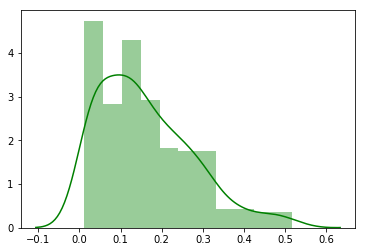

In [184]:
folderFig = "C:/Users/i235jbp/Dropbox/PhD/Spørreundersøkelse/Artikkel"
import seaborn as sns
sns.distplot(P_1_3, color="green")

filename = folderFig+'/P13.png'
plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


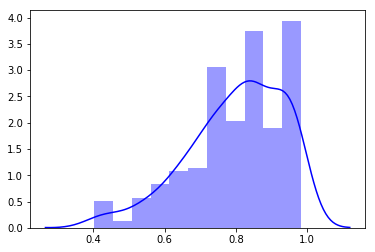

In [185]:
import seaborn as sns
sns.distplot(P_2_3, color="blue")
filename = folderFig+'/P23.png'
plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


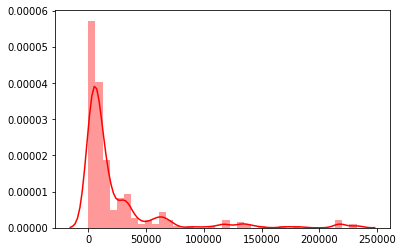

In [186]:
sns.distplot(listePredY2eNo3, color="red")

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


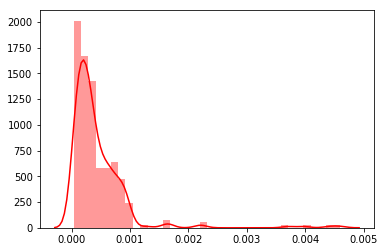

In [187]:
import seaborn as sns
sns.distplot(P_3_3, color="red")
filename = folderFig+'/P33.png'
plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


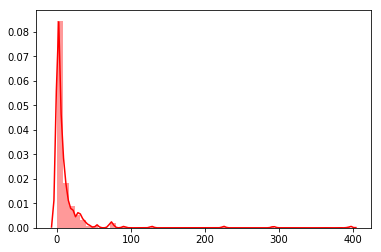

In [188]:
import seaborn as sns
sns.distplot(listePredY3eNo3, color="red")
# filename = folderFig+'/PP33.png'
# plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


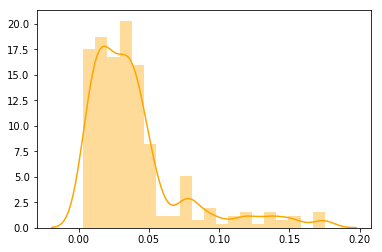

In [189]:
import seaborn as sns
sns.distplot(P_4_3, color="orange")
filename = folderFig+'/P43.png'
plt.savefig(filename)

In [190]:
# plt.hist(P_2_2, 50, normed=1, facecolor='blue', alpha=0.5)
# sns.distplot(P_5_3, color="purple")
# filename = folderFig+'/P53.png'
# plt.savefig(filename)

C:\Users\i235jbp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


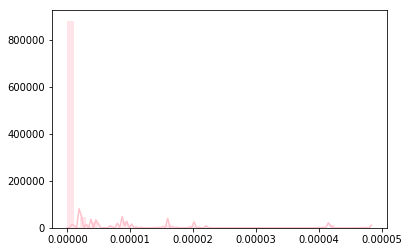

In [191]:
# plt.hist(P_6_2, 50, normed=1, facecolor='red', alpha=0.5)
sns.distplot(P_6_3, color="pink")
filename = folderFig+'/P63.png'
plt.savefig(filename)

In [192]:
df3_ex = pd.concat([df_short3, df['no3_1']], axis=1)

In [193]:
df3_ex.head()

,higheduc,smallcap,largecap,subsidary,no2_1,no2_2,sensitivity,hurdleRate,no3_1
0,0.0,1,0,0,1,1,0,1,0
1,1.0,0,1,0,2,2,0,1,0
2,1.0,1,0,0,2,2,0,1,0
3,0.0,1,0,0,3,0,0,0,0
4,0.0,1,0,0,1,2,0,1,0


In [201]:
# from sklearn.model_selection import train_test_split
len(X_3), len(y_31)

(309, 309)

In [203]:
from sklearn.linear_model import LogisticRegression
modelno31 = LogisticRegression()
modelno31.fit(X_3,y_31)
predictions = modelno31.predict(X_3)

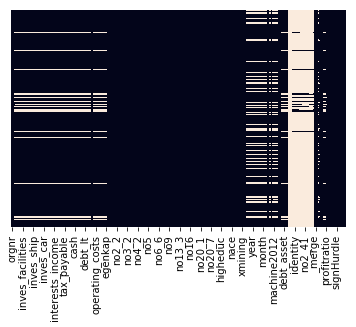

In [210]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_31,predictions))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95       280
          1       0.00      0.00      0.00        29

avg / total       0.82      0.91      0.86       309



C:\Users\i235jbp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
X_3 = df_short3.values
y_31 = df['no3_1'].values
y_32 = df['no3_2'].values
y_33 = df['no3_3'].values
y_34 = df['no3_4'].values
y_35 = df['no3_5'].values
y_36 = df['no3_6'].values

array([[0., 1., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 2., 0., 1.],
       [1., 1., 0., ..., 2., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 3., 0., 0.]])

In [63]:
len(df_short3)
df_short3=df_short3.loc[:,explanatoryNo3].dropna(axis=0, how='any')
df_short3.head()

298

In [73]:
df['higheduc'].isnull()



0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20      True
21     False
22     False
23      True
24     False
25     False
26     False
27     False
28      True
29     False
       ...  
279    False
280    False
281    False
282    False
283    False
284    False
285     True
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
300    False
301    False
302    False
303    False
304    False
305    False
306    False
307    False
308    False
Name: higheduc, Length: 309, dtype: bool